<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [3]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [4]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [5]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [6]:
# Answer:
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [7]:
# Answer:
movies_sort_values=movies.sort_values('duration')
left=movies_sort_values.head(1)
right=movies_sort_values.tail(1)
movies_sort_values=pd.merge(left,right,how='outer')
movies_sort_values

,star_rating,title,content_rating,genre,duration,actors_list
0,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
1,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E32A528AC8>]],
      dtype=object)

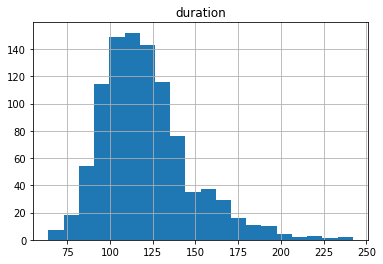

In [8]:
# Answer:
movies.hist('duration',bins=20)

#### Use a box plot to display that same data.

{'boxes': [<matplotlib.lines.Line2D at 0x1e32b86ba20>],
 'caps': [<matplotlib.lines.Line2D at 0x1e32b876470>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e32b8814e0>],
 'means': [<matplotlib.lines.Line2D at 0x1e32a3b5940>],
 'medians': [<matplotlib.lines.Line2D at 0x1e32b876cc0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1e32b86bb70>,
  <matplotlib.lines.Line2D at 0x1e32b876048>]}

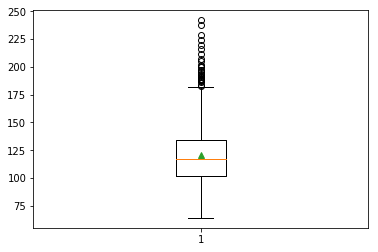

In [9]:
# Answer:
#movies.boxplot(column='duration')
plt.boxplot(movies.duration,showbox=True,showmeans=True,showcaps=True,showfliers=True)

## Intermediate level

#### Count how many movies have each of the content ratings.

In [10]:
# Answer:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

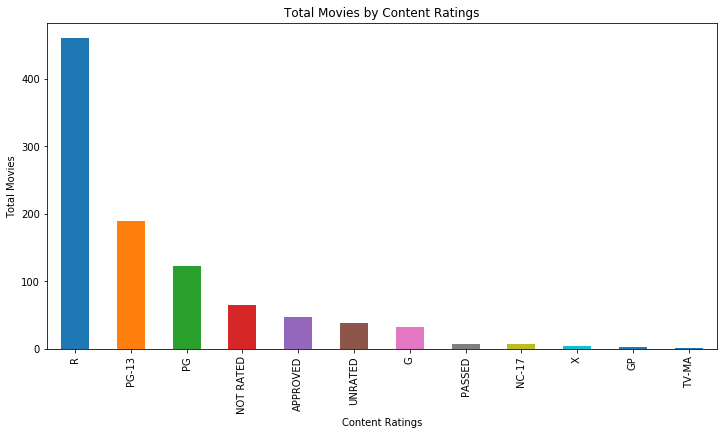

In [11]:
# Answer:
movies.content_rating.value_counts().plot(kind='bar',figsize=(12,6))
plt.xlabel('Content Ratings');
plt.ylabel('Total Movies');
plt.title('Total Movies by Content Ratings');
#movies.content_rating.value_counts().plot(kind='bar',title='Total Movies by Content Ratings', x='Content Ratings',y='Total Movies')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [12]:
# Answer:
#movies
movies.replace({'NOT RATED':'UNRATED','APPROVED':'UNRATED','PASSED':'UNRATED', 'GP':'UNRATED'}, inplace=True)
#movies
#movies.content_rating.value_counts()

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [13]:
# Answer:
movies.replace({'X':'NC-17','TV-MA':'NC-17'}, inplace=True)
#movies
#movies.content_rating.value_counts()

#### Count the number of missing values in each column.

In [15]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [170]:
# Answer:
movies.isnull().fillna(value='UNRATED', inplace=True)
movies

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [171]:
### Answer:
duration120 = movies.duration.apply(lambda duration: duration >= 120)
movies_duration120_mean = movies[duration120].star_rating.mean()

duration120below = movies.duration.apply(lambda duration: duration < 120)
movies_duration120below_mean = movies[duration120below].star_rating.mean()

print('The average star rating for movies 2 hours or longer is ' + str(movies_duration120_mean) + ' and the average star rating for movies shorter than 2 hours is ' + str(movies_duration120below_mean) )

The average star rating for movies 2 hours or longer is 7.948898678414082 and the average star rating for movies shorter than 2 hours is 7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

,star_rating,duration
star_rating,1.000000,0.227149
duration,0.227149,1.000000


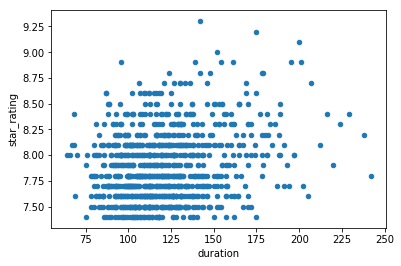

In [172]:
# Answer:
movies.plot(kind='scatter', x='duration', y='star_rating')
movies.corr()

#### Calculate the average duration for each genre.

In [173]:
# Answer:
movies.groupby('genre').duration.mean()


genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

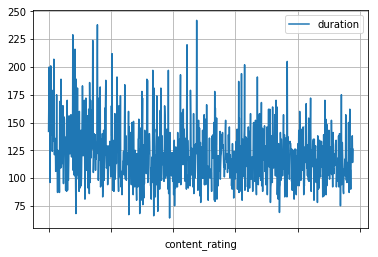

In [174]:
# Answer:
movies.plot(kind='line',y='duration',x='content_rating',grid=True)

#### Determine the top rated movie (by star rating) for each genre.

In [175]:
# Answer:
movies.groupby('genre').star_rating.max()

genre
Action       9.0
Adventure    8.9
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.3
Drama        8.9
Family       7.9
Fantasy      7.7
Film-Noir    8.3
History      8.0
Horror       8.6
Mystery      8.6
Sci-Fi       8.2
Thriller     8.0
Western      8.9
Name: star_rating, dtype: float64

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [176]:
# Answer:
movies[movies.duplicated(['title'])]

,star_rating,title,content_rating,genre,duration,actors_list
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [198]:
movies.genre.value_counts() >= 10
genres_10more = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']
#genres_10more
movies[movies.genre.isin(genres_10more)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [201]:
genre_counts = movies.genre.value_counts()
genres_10more = movies.genre.value_counts() >= 10
genres_index = genre_counts[genres_10more == True].index
movies[movies.genre.isin(genres_index)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [202]:
# Answer:
movies.groupby('genre').star_rating.mean()[movies.genre.value_counts() >= 10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [204]:
# Answer:
genre_stat = movies.groupby('genre').star_rating.agg(['count', 'mean'])
genre_stat[genre_stat['count'] >= 10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [214]:
#there are duplicate rows in the actors data
movies[movies.actors_list.duplicated()]

,star_rating,title,content_rating,genre,duration,actors_list
19,8.7,Star Wars,PG,Action,121,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
80,8.4,Star Wars: Episode VI - Return of the Jedi,PG,Action,134,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
414,7.9,Toy Story 2,G,Animation,92,"[u'Tom Hanks', u'Tim Allen', u'Joan Cusack']"
520,7.8,Back to the Future Part II,PG,Adventure,108,"[u'Michael J. Fox', u'Christopher Lloyd', u'Le..."
551,7.8,Harry Potter and the Prisoner of Azkaban,PG,Adventure,142,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
642,7.7,Harry Potter and the Deathly Hallows: Part 1,PG-13,Adventure,146,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
727,7.6,Harry Potter and the Goblet of Fire,PG-13,Adventure,157,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
814,7.6,The Hobbit: The Battle of the Five Armies,PG-13,Adventure,144,"[u'Ian McKellen', u'Martin Freeman', u'Richard..."
891,7.5,Harry Potter and the Half-Blood Prince,PG,Adventure,153,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
932,7.4,Harry Potter and the Order of the Phoenix,PG-13,Adventure,138,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
